In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

file_path = "E-commerce Customer Behavior - Sheet1 (1).csv"
data = pd.read_csv(file_path)


In [7]:

# Display basic information
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [9]:

# -------------------------------------------
# 1. MISSING DATA HANDLING
# -------------------------------------------
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing numeric values with median, categorical with mode
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Numeric imputation
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Categorical imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

print("\nAfter Imputation:")
print(data.isnull().sum())




Missing Values:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

After Imputation:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [11]:
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

print("\nData after encoding:")
display(data.head())




Data after encoding:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101.0,0,29.0,4,1,1120.20,14.0,4.6,True,25.0,1
1,102.0,1,34.0,2,2,780.50,11.0,4.1,False,18.0,0
2,103.0,0,43.0,0,0,510.75,9.0,3.4,True,42.0,2
3,104.0,1,30.0,5,1,1480.30,19.0,4.7,False,12.0,1
4,105.0,1,27.0,3,2,720.40,13.0,4.0,True,55.0,2


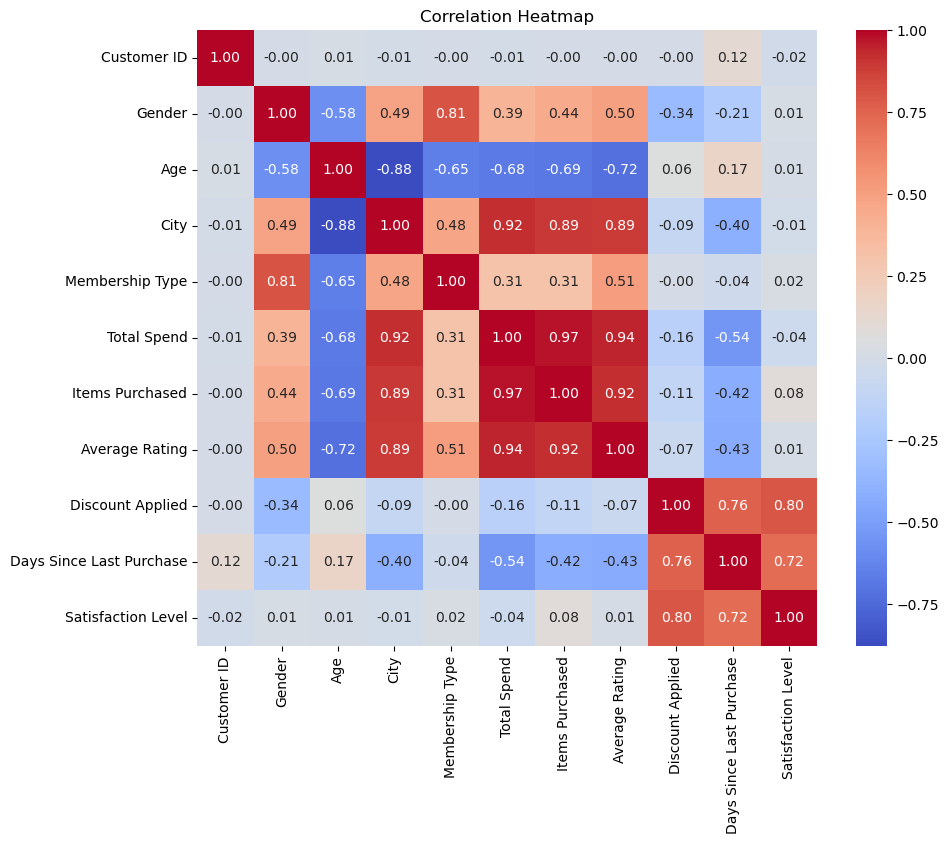

In [13]:

plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply scaling
data_std = pd.DataFrame(scaler_std.fit_transform(data), columns=data.columns)
data_minmax = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)

print("\nData after Standard Scaling:")
display(data_std.head())

print("\nData after Min-Max Scaling:")
display(data_minmax.head())



Data after Standard Scaling:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.727109,-1.0,-0.945152,0.878073,-0.003502,0.760130,0.337346,1.001981,1.0,-0.118359,-0.032232
1,-1.717212,1.0,0.082826,-0.294925,1.222126,-0.179459,-0.385538,0.139479,-1.0,-0.639907,-1.285682
2,-1.707314,-1.0,1.933185,-1.467924,-1.229130,-0.925570,-0.867461,-1.068024,1.0,1.148256,1.221219
3,-1.697417,1.0,-0.739557,1.464572,-0.003502,1.756144,1.542153,1.174482,-1.0,-1.086947,-0.032232
4,-1.687519,1.0,-1.356343,0.291574,1.222126,-0.345692,0.096385,-0.033022,1.0,2.116844,1.221219



Data after Min-Max Scaling:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0.000000,0.0,0.176471,0.8,0.5,0.639502,0.500000,0.842105,1.0,0.296296,0.5
1,0.002865,1.0,0.470588,0.4,1.0,0.333273,0.285714,0.578947,0.0,0.166667,0.0
2,0.005731,0.0,1.000000,0.0,0.0,0.090102,0.142857,0.210526,1.0,0.611111,1.0
3,0.008596,1.0,0.235294,1.0,0.5,0.964122,0.857143,0.894737,0.0,0.055556,0.5
4,0.011461,1.0,0.058824,0.6,1.0,0.279095,0.428571,0.526316,1.0,0.851852,1.0


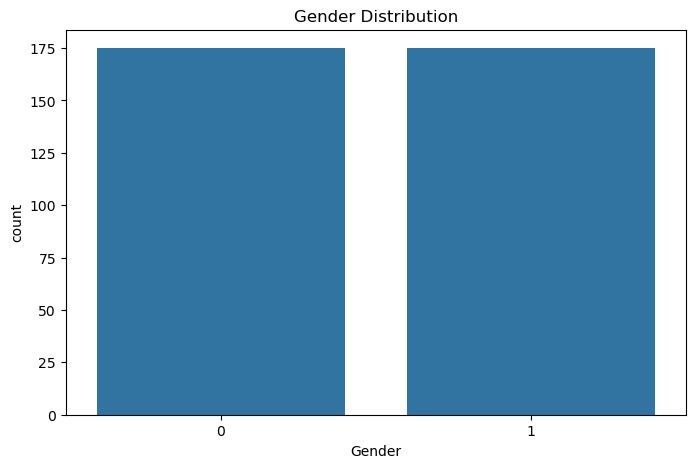

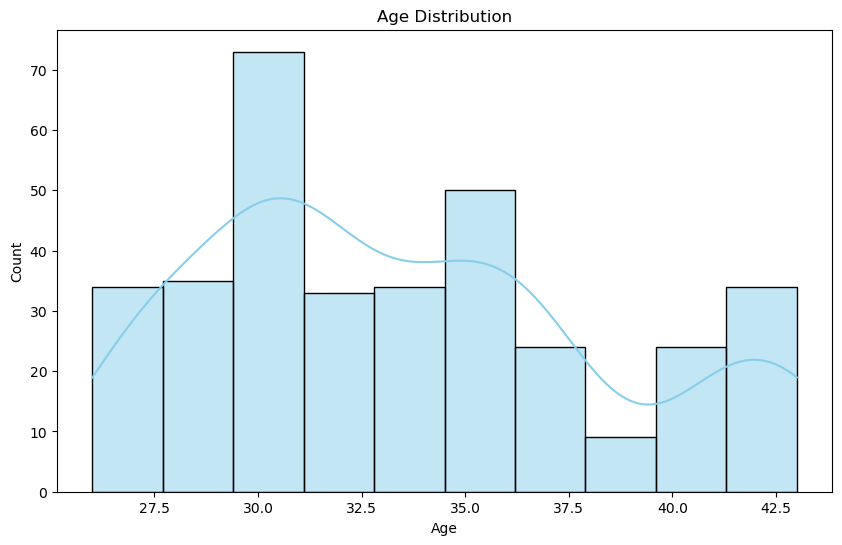

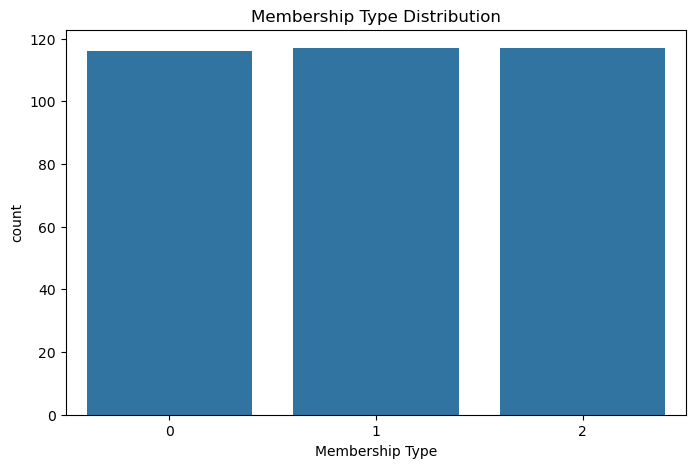

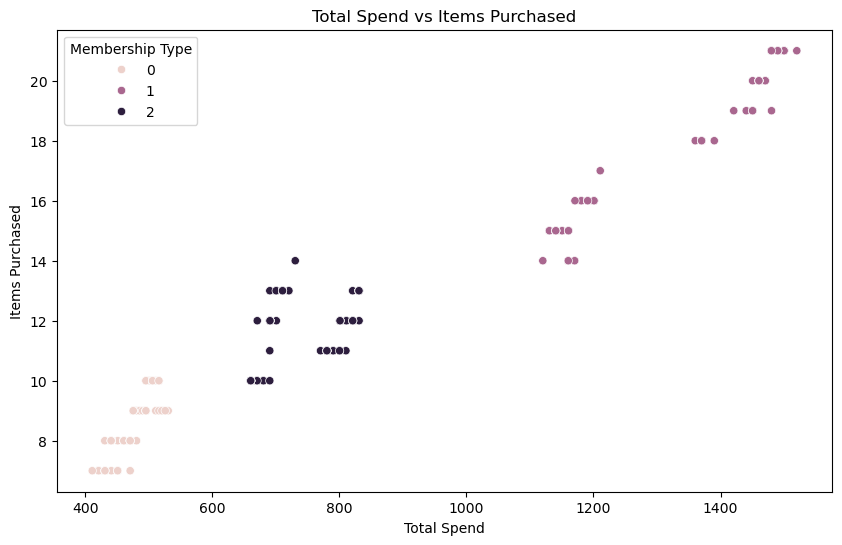

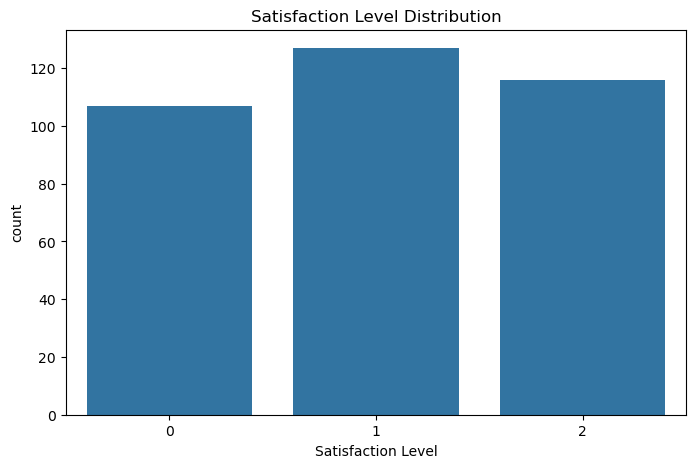

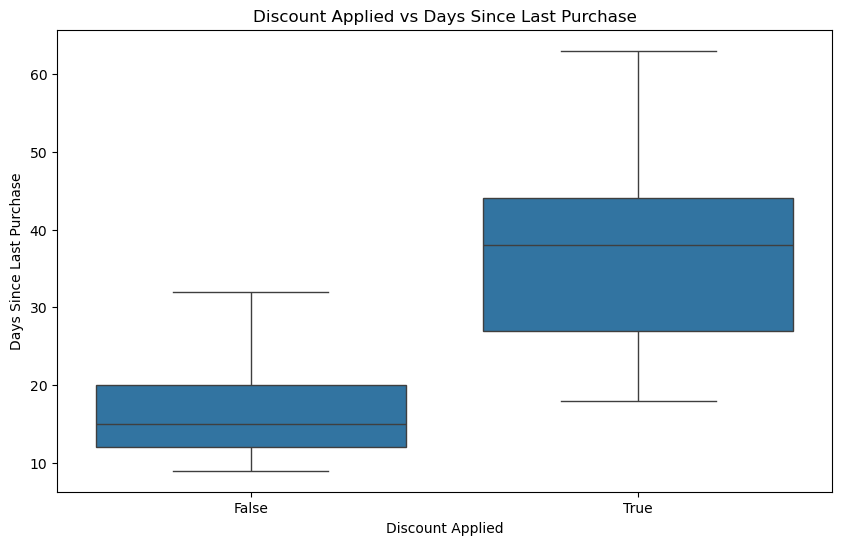

In [17]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Membership Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Membership Type', data=data)
plt.title("Membership Type Distribution")
plt.show()

# Spend vs. Items Purchased
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spend', y='Items Purchased', hue='Membership Type', data=data)
plt.title('Total Spend vs Items Purchased')
plt.show()

# Satisfaction Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction Level', data=data)
plt.title("Satisfaction Level Distribution")
plt.show()

# Discount Applied vs. Days Since Last Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Days Since Last Purchase', data=data)
plt.title('Discount Applied vs Days Since Last Purchase')
plt.show()